In [20]:
library(caret)
library(dplyr)
options(warn = -1)
library(caret)
library(nnet)
library(e1071)
library(randomForest)
library(party)
# library(NbClust)
library(class)

In [18]:
서울대전앞뒤2일 <- read.csv('../Data_Project/alldata.csv')[,-c(5:9)]
서울대전앞뒤2일[,1] <- as.Date(서울대전앞뒤2일[,1])
head(서울대전앞뒤2일)


날짜,일차,출발시간,소요시간
2013-02-08,0,0,91
2013-02-09,1,0,132
2013-02-10,2,0,83
2013-02-11,3,0,87
2013-02-12,4,0,84
2013-02-08,0,1,88


In [19]:
sum <- 0

for (i in 1:100){
  samp <- createDataPartition(서울대전앞뒤2일$소요시간, p=0.7, list=F)
  data.tr <- 서울대전앞뒤2일[samp,]
  data.test <- 서울대전앞뒤2일[-samp,]

  x <- subset(data.test, select = -소요시간)
  y <- data.test$소요시간

  model_rf <- randomForest(소요시간 ~ . , data = data.tr, ntree = 100)
  pred_rf <- predict(model_rf, x)
  knn_pred <- knn(train=data.tr, test=data.test, cl=st_train_label, k=21)
  예측력_rf <- mean((pred_rf*0.85 < y) & (pred_rf*1.15 > y)) 
  sum <- sum + 예측력_rf
}

sum

[1] 81.98596

In [23]:
## 다 : 66.8
## 1:4 : 68.3

In [27]:
sd22 <- read.csv("../Data_Project/진짜최종.csv")

head(sd22)
nrow(sd22)

소요시간,일차,출발시간,연휴길이
91,0,0,3
88,0,1,3
88,0,2,3
87,0,3,3
91,0,4,3
97,0,5,3


[1] 1008

In [38]:
sum <- 0

for (i in 1:100){
  samp <- createDataPartition(sd22$소요시간, p=0.7, list=F)
  data.tr <- sd22[samp,]
  data.test <- sd22[-samp,]

  x <- subset(data.test, select = -소요시간)
  y <- data.test$소요시간

  model_rf <- randomForest(소요시간 ~ . , data = data.tr, ntree = 100)
  pred_rf <- predict(model_rf, x)
  예측력_rf <- mean((pred_rf*0.80< y) & (pred_rf*1.2 > y)) 
  sum <- sum + 예측력_rf
}

sum

[1] 83.71333

In [40]:
sdTime <- aggregate(소요시간 ~ 출발시간, sd22, mean)
sdTime

출발시간,소요시간
0,94.14286
1,93.76190
2,94.45238
3,95.54762
4,94.47619
5,95.47619
6,96.69048
7,98.02381
8,97.64286
9,99.69048


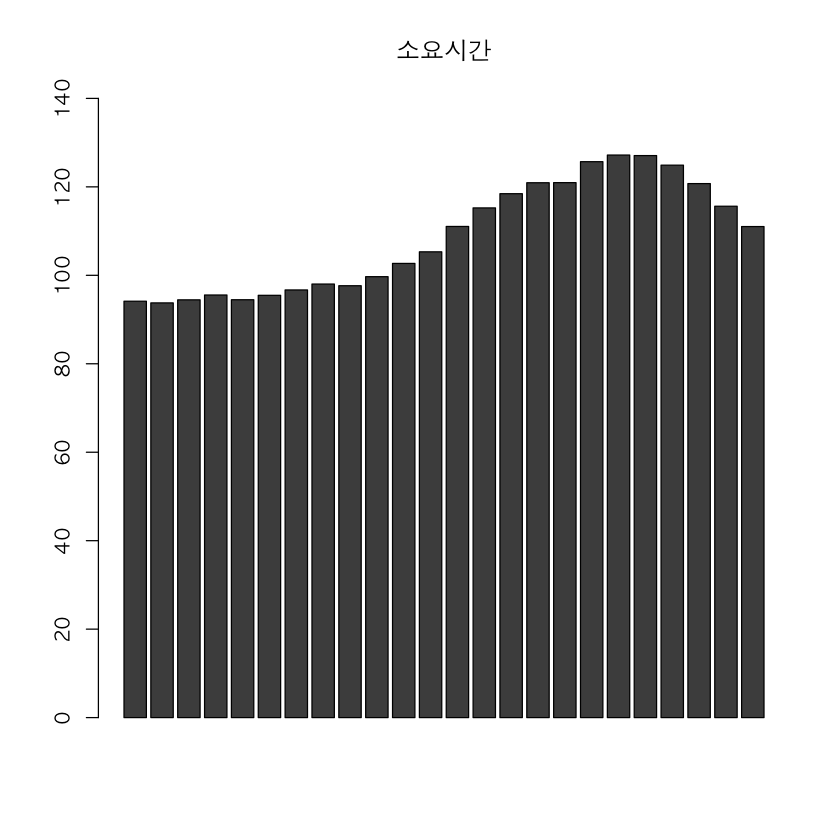

In [48]:
par(family = "AppleGothic")

barplot(
    t(sdTime[,-1]),
    main = '소요시간',
    ylim = c(0, 140),

)

In [49]:
table(sd22$일차)


  0   1   2   3   4   5 
192 192 192 192 168  72 